<a href="https://colab.research.google.com/github/RemnantArgon001/Project2/blob/main/Copy_of_Project_2_Part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First choice: 

1) Source of data:https://www.kaggle.com/datasets/mastmustu/income

2) Brief description of data:Data is asking you to predict price but outer 8 vehical characteristics.
It can be used to practice machine learning problem like classification.

3) What is the target? price

4) Is this a classification or regression problem?Regression

5) How many features? 10

6) How many rows of data: 17966

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset? duplicate model types of cars and correlatation to years

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [6]:
Ford_df=pd.read_csv('/content/ford.csv')
Ford_df.head()

FileNotFoundError: ignored

In [ ]:
Ford_df.shape



Second choice: Fuel consumption 

1) Source of data https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

2) Brief description of data:Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada in 2022.

3) What is the target? Fuel Consumption(Comb (mpg)

4) Is this a classification or regression problem? Regression

5) How many features?15

6) How many rows of data.946

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset? having to ensure of no leakage lots of values to classify as well as ohe

In [3]:
df=pd.read_csv('/content/MY2022 Fuel Consumption Ratings.csv')

In [4]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [6]:
df.shape

(946, 15)

Out of the two data sets I have provided I was allowed to select either one of them. 
I have chosen to go with my second choice Fuel Consumption. 


In [7]:
#Deleating unessisary columns
#first I will take a deeper dive into my data looking at columns that would not be needed as they provide no real value in determining fuel consumption. 

In [8]:
from pandas.core.algorithms import value_counts

In [9]:
df['Model Year'].value_counts()

2022    946
Name: Model Year, dtype: int64

In [10]:
# we have confirmed that the entire data set only has cars from the year 2022 this column can be dropped. The L/100km colums will be dropped.
df.drop(labels=['Model Year','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))'],axis=1, inplace=True)

In [11]:
#confirm column is dropped from data frame.
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,33,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,25,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,29,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,27,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,29,230,5,7


In [12]:
# I am chosing to keep the rest of my data 

In [13]:
# checking for dupicate values in my data set. 

In [14]:
df.duplicated().sum()

0

In [15]:
# There are no duplicated values in my data set. 

In [16]:
# check for missing values in data set. 


In [17]:
df.isna().sum()

Make                            0
Model                           0
Vehicle Class                   0
Engine Size(L)                  0
Cylinders                       0
Transmission                    0
Fuel Type                       0
Fuel Consumption(Comb (mpg))    0
CO2 Emissions(g/km)             0
CO2 Rating                      0
Smog Rating                     0
dtype: int64

In [18]:
#Identify and correct any inconsistencies in data for categorical values (i.e. Cat, cat, cats)
# will divide the Fuel Consumption(Comb (mpg)) colum by 1.02 to got unit into U.S mpg as it currently is in imperial 

In [19]:
df['Fuel Consumption(Comb (mpg))'] = (df['Fuel Consumption(Comb (mpg))'] / 1.02)

In [20]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,32.352941,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,24.509804,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,28.431373,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,26.470588,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,28.431373,230,5,7


In [21]:
#Renaming column Fuel Consumption(Comb (mpg)) to U.S. MPG

In [22]:
df.rename(columns = {'Fuel Consumption(Comb (mpg))':'U.S. MPG'}, inplace = True)

In [23]:
# lots of excess places after decimal point going to round the the column

In [24]:
df.round({'U.S. MPG': 1})

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,U.S. MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,AM8,Z,32.4,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,24.5,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,28.4,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,26.5,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,28.4,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...
941,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,29.4,219,5,5
942,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,29.4,219,5,5
943,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,28.4,232,5,7
944,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,27.5,236,5,5


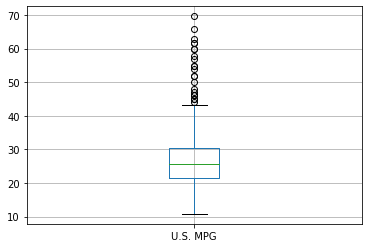

In [25]:
# produce univariate visuals for the target and all features
df.boxplot(column = 'U.S. MPG');

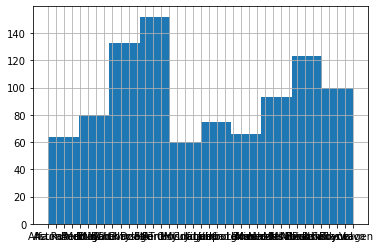

In [32]:
df['Make'].hist();

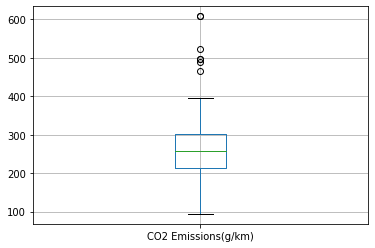

In [27]:
df.boxplot(column = 'CO2 Emissions(g/km)');

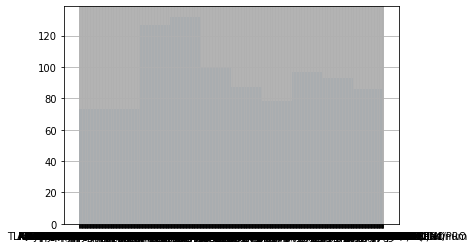

In [33]:
df['Model'].hist();

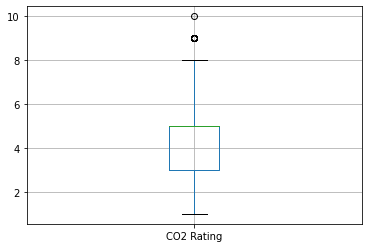

In [28]:
df.boxplot(column = 'CO2 Rating');

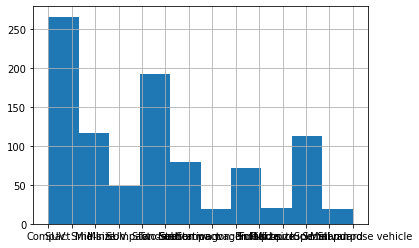

In [35]:
	df['Vehicle Class'].hist();

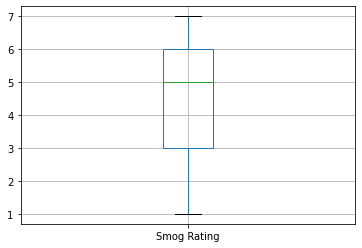

In [29]:
df.boxplot(column = 'Smog Rating');

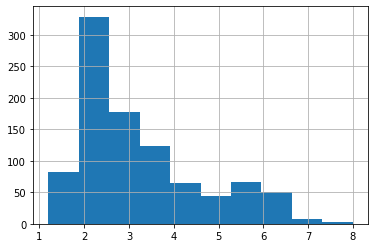

In [36]:
	df['Engine Size(L)'].hist();

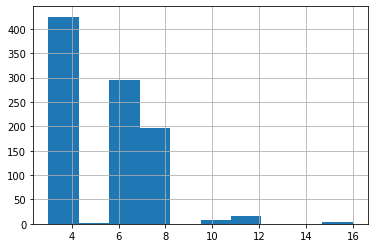

In [37]:
	df['Cylinders'].hist();

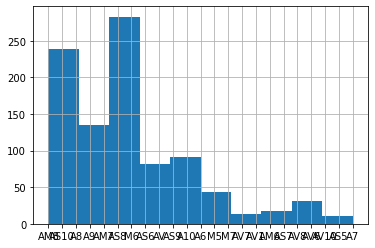

In [38]:
	df['Transmission'].hist();

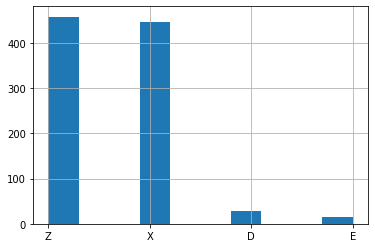

In [39]:
	df['Fuel Type'].hist();

In [ ]:
# produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

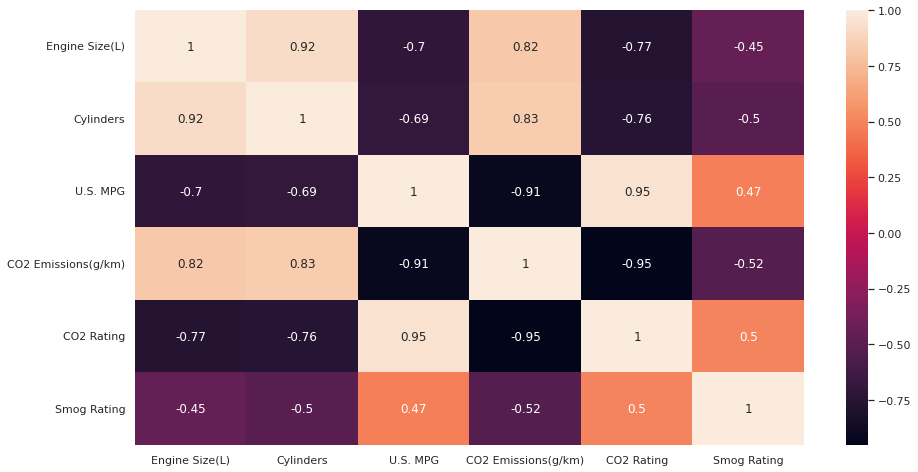

In [44]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot = True);

In [ ]:
 # identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [ ]:
#Target strong correlations: U.S. MPG with CO2 Rating and a moderate correlation with Smog rating. Almost no correlation with Emisions cylinders or engine size

In [ ]:
# Other stong correlations CO2 emissions and smog rating with Engine size.